# 프로그래밍3 프로젝트
산업데이터사이언스학부 201904200 김지혜

### 1. 데이터에 대한 설명

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
species = pd.read_csv('data/Endangered_Species.csv', encoding='cp949')
species

,분류군,등급,국명,학명,고유종,국가적색목록,세계자연보전연맹
0,포유류,I,늑대,Canis lupus coreanus,NaN,RE,LC
1,포유류,I,대륙사슴,Cervus nippon hortulorum,NaN,RE,LC
2,포유류,I,반달가슴곰,Ursus thibetanus ussuricus,NaN,EN,VU
3,포유류,I,붉은박쥐,Myotis rufoniger,NaN,VU,LC
4,포유류,I,사향노루,Moschus moschiferus,NaN,CR,VU
...,...,...,...,...,...,...,...
262,식물,II,홍월귤,Arctous alpinus var. japonicus,NaN,VU,NaN
263,식물,II,황근,Hibiscus hamabo,NaN,VU,NaN
264,해조류,II,그물공말,Dictyosphaeria cavernosa,NaN,NaN,NaN
265,해조류,II,삼나무말,Coccophora langsdorfii,NaN,NaN,NaN


In [3]:
species.columns

Index(['분류군', '등급', '국명', '학명', '고유종', '국가적색목록', '세계자연보전연맹'], dtype='object')

In [4]:
species.세계자연보전연맹.value_counts()

LC    63
VU    24
EN    16
NT     7
CR     3
DD     3
Name: 세계자연보전연맹, dtype: int64

##### CR(위급) - EN(위기) - VU(취약) - NT(준위협) - LC(관심대상) - DD(정보부족) - NE(미평가) + RE(지역절멸)

### 2. 데이터 탐색 및 분석 포인트 설명

In [5]:
species.dtypes

분류군         object
등급          object
국명          object
학명          object
고유종         object
국가적색목록      object
세계자연보전연맹    object
dtype: object

In [6]:
species.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 267 entries, 0 to 266
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   분류군       267 non-null    object
 1   등급        267 non-null    object
 2   국명        267 non-null    object
 3   학명        267 non-null    object
 4   고유종       46 non-null     object
 5   국가적색목록    237 non-null    object
 6   세계자연보전연맹  116 non-null    object
dtypes: object(7)
memory usage: 14.7+ KB


In [7]:
species.describe().T

,count,unique,top,freq
분류군,267,9,식물,88
등급,267,2,II,207
국명,267,267,작은관코박쥐,1
학명,267,267,Mankyua chejuense,1
고유종,46,1,Y,46
국가적색목록,237,7,VU,99
세계자연보전연맹,116,6,LC,63


In [8]:
species.국가적색목록.value_counts(normalize=True)

VU    0.417722
EN    0.329114
CR    0.143460
RE    0.037975
LC    0.033755
NE    0.021097
NT    0.016878
Name: 국가적색목록, dtype: float64

In [9]:
species.세계자연보전연맹.value_counts(normalize=True)

LC    0.543103
VU    0.206897
EN    0.137931
NT    0.060345
CR    0.025862
DD    0.025862
Name: 세계자연보전연맹, dtype: float64

In [10]:
species.isna().sum()

분류군           0
등급            0
국명            0
학명            0
고유종         221
국가적색목록       30
세계자연보전연맹    151
dtype: int64

### 3. 데이터 분석

In [11]:
species.고유종 = species.고유종.fillna('N')

In [12]:
species.국가적색목록 = species.국가적색목록.fillna('NE')
species.세계자연보전연맹 = species.세계자연보전연맹.fillna('NE')

In [13]:
species.isna().sum()

분류군         0
등급          0
국명          0
학명          0
고유종         0
국가적색목록      0
세계자연보전연맹    0
dtype: int64

In [14]:
species.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 267 entries, 0 to 266
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   분류군       267 non-null    object
 1   등급        267 non-null    object
 2   국명        267 non-null    object
 3   학명        267 non-null    object
 4   고유종       267 non-null    object
 5   국가적색목록    267 non-null    object
 6   세계자연보전연맹  267 non-null    object
dtypes: object(7)
memory usage: 14.7+ KB


In [15]:
species.memory_usage(deep=True)

Index         128
분류군         23302
등급          15693
국명          24316
학명          20492
고유종         15486
국가적색목록      15753
세계자연보전연맹    15753
dtype: int64

In [16]:
species.describe().T

,count,unique,top,freq
분류군,267,9,식물,88
등급,267,2,II,207
국명,267,267,작은관코박쥐,1
학명,267,267,Mankyua chejuense,1
고유종,267,2,N,221
국가적색목록,267,7,VU,99
세계자연보전연맹,267,7,NE,151


In [17]:
species.분류군.value_counts()

식물       88
조류       63
무척추동물    32
어류       27
곤충류      26
포유류      20
양서파충류     8
해조류       2
고등균류      1
Name: 분류군, dtype: int64

In [18]:
species['분류군'] = species['분류군'].astype('category')

In [19]:
species.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 267 entries, 0 to 266
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   분류군       267 non-null    category
 1   등급        267 non-null    object  
 2   국명        267 non-null    object  
 3   학명        267 non-null    object  
 4   고유종       267 non-null    object  
 5   국가적색목록    267 non-null    object  
 6   세계자연보전연맹  267 non-null    object  
dtypes: category(1), object(6)
memory usage: 13.3+ KB


In [20]:
species[['분류군', '국명', '국가적색목록', '세계자연보전연맹']]

,분류군,국명,국가적색목록,세계자연보전연맹
0,포유류,늑대,RE,LC
1,포유류,대륙사슴,RE,LC
2,포유류,반달가슴곰,EN,VU
3,포유류,붉은박쥐,VU,LC
4,포유류,사향노루,CR,VU
...,...,...,...,...
262,식물,홍월귤,VU,NE
263,식물,황근,VU,NE
264,해조류,그물공말,NE,NE
265,해조류,삼나무말,NE,NE


In [21]:
plt.rcParams['font.family'] = 'Malgun Gothic'

<BarContainer object of 9 artists>

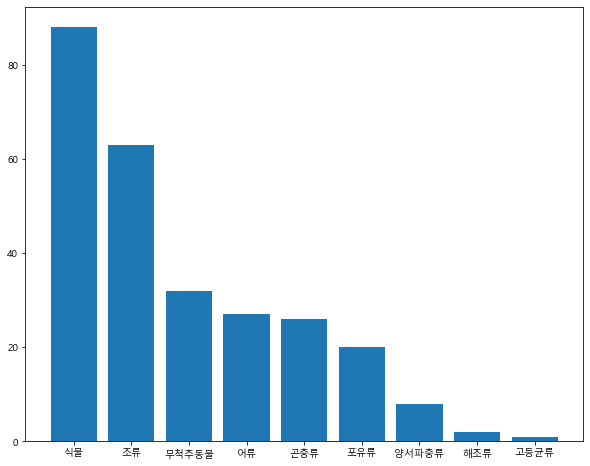

In [22]:
fig, ax = plt.subplots(figsize=(10, 8))

plt.bar(species.분류군.value_counts().index, species.분류군.value_counts())

C:\Users\user\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:ylabel='국가적색목록'>

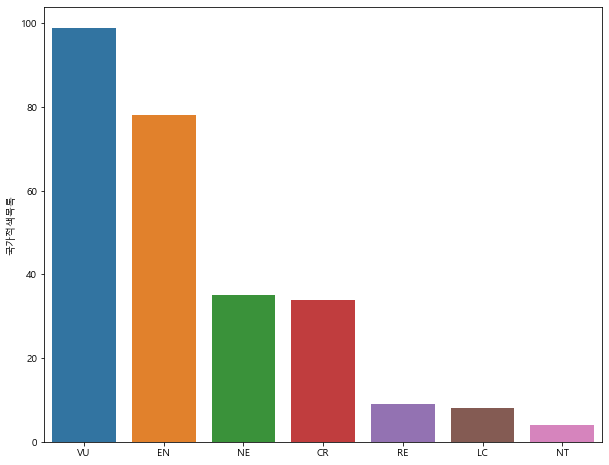

In [23]:
fig, ax = plt.subplots(figsize=(10, 8))

sns.barplot(species.국가적색목록.value_counts().index, species.국가적색목록.value_counts())

C:\Users\user\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:ylabel='세계자연보전연맹'>

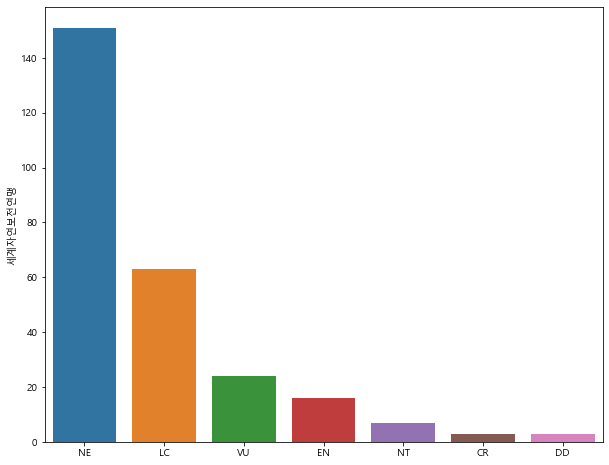

In [24]:
fig, ax = plt.subplots(figsize=(10, 8))

sns.barplot(species.세계자연보전연맹.value_counts().index, species.세계자연보전연맹.value_counts())

<AxesSubplot:xlabel='count', ylabel='분류군'>

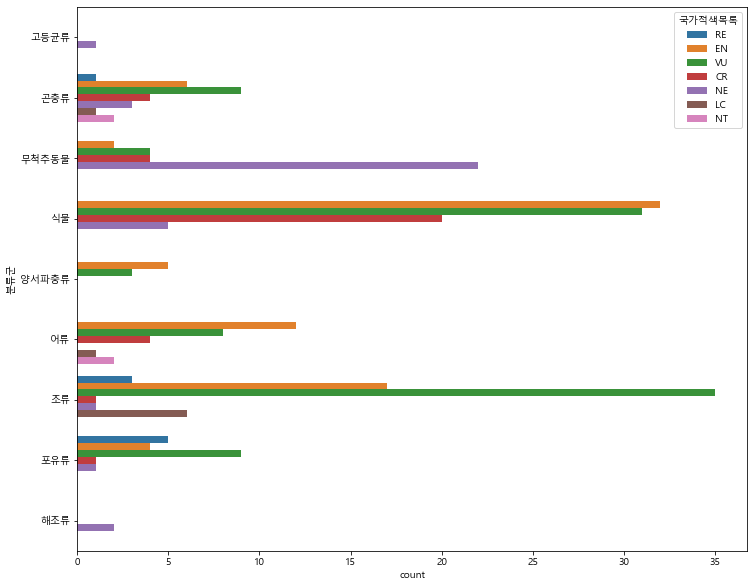

In [27]:
fig, ax = plt.subplots(figsize=(12, 10))

sns.countplot(y='분류군',
              data=species,
              hue='국가적색목록'
)

<AxesSubplot:xlabel='count', ylabel='분류군'>

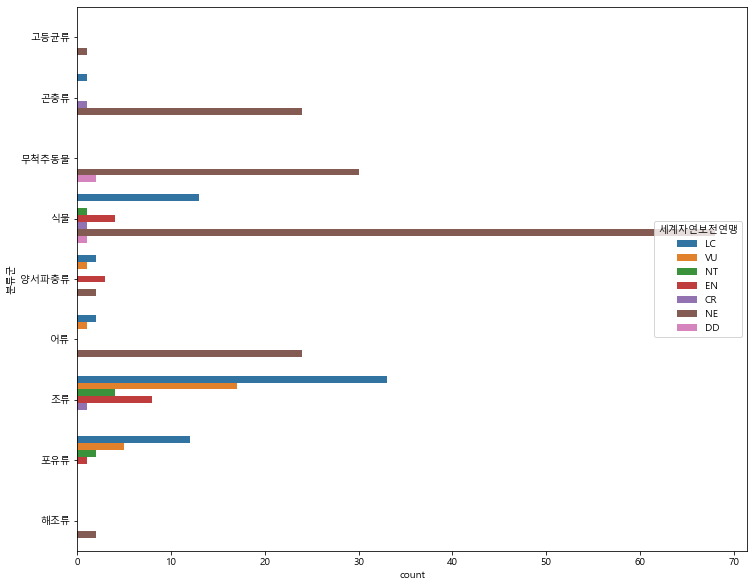

In [28]:
fig, ax = plt.subplots(figsize=(12, 10))

sns.countplot(y='분류군',
              data=species,
              hue='세계자연보전연맹'
)

In [29]:
a1 = species['국가적색목록'] == 'RE'
a2 = species['국가적색목록'] == 'CR'
a3 = species['국가적색목록'] == 'EN'

a = a1 | a2 | a3

In [30]:
b1 = species['국가적색목록'] == 'VU'
b2 = species['국가적색목록'] == 'NT'
b3 = species['국가적색목록'] == 'LC'

b = b1 | b2 | b3

In [37]:
print(a.sum(), b.sum())

121 111


In [39]:
species.melt(id_vars=['국명'], value_vars=['국가적색목록', '세계자연보전연맹'])

,국명,variable,value
0,늑대,국가적색목록,RE
1,대륙사슴,국가적색목록,RE
2,반달가슴곰,국가적색목록,EN
3,붉은박쥐,국가적색목록,VU
4,사향노루,국가적색목록,CR
...,...,...,...
529,홍월귤,세계자연보전연맹,NE
530,황근,세계자연보전연맹,NE
531,그물공말,세계자연보전연맹,NE
532,삼나무말,세계자연보전연맹,NE


In [40]:
a = species.groupby(['분류군', '등급'])

a.ngroups
for n, g in a:
    print(n)
    display(g.head(3))

('고등균류', 'II')


,분류군,등급,국명,학명,고유종,국가적색목록,세계자연보전연맹
266,고등균류,II,화경버섯,Lampteromyces japonicus,N,NE,NE


('곤충류', 'I')


,분류군,등급,국명,학명,고유종,국가적색목록,세계자연보전연맹
118,곤충류,I,붉은점모시나비,Parnassius bremeri,N,VU,NE
119,곤충류,I,비단벌레,Chrysochroa coreana,N,VU,NE
120,곤충류,I,산굴뚝나비,Hipparchia autonoe,N,EN,NE


('곤충류', 'II')


,분류군,등급,국명,학명,고유종,국가적색목록,세계자연보전연맹
124,곤충류,II,깊은산부전나비,Protantigius superans,N,VU,NE
125,곤충류,II,꼬마잠자리,Nannophya pygmaea,N,VU,LC
126,곤충류,II,노란잔산잠자리,Macromia daimoji,N,EN,NE


('무척추동물', 'I')


,분류군,등급,국명,학명,고유종,국가적색목록,세계자연보전연맹
144,무척추동물,I,귀이빨대칭이,Cristaria plicata,N,VU,DD
145,무척추동물,I,나팔고둥,Charonia lampas sauliae,N,VU,NE
146,무척추동물,I,남방방게,Pseudohelice subquadrata,N,NE,NE


('무척추동물', 'II')


,분류군,등급,국명,학명,고유종,국가적색목록,세계자연보전연맹
148,무척추동물,II,갯게,Chasmagnathus convexus,N,NE,NE
149,무척추동물,II,거제외줄달팽이,Satsuma myomphala,N,CR,NE
150,무척추동물,II,검붉은수지맨드라미,Dendronephthya suensoni,N,NE,NE


('식물', 'I')


,분류군,등급,국명,학명,고유종,국가적색목록,세계자연보전연맹
176,식물,I,광릉요강꽃,Cypripedium japonicum,N,CR,EN
177,식물,I,금자란,Gastrochilus fuscopunctatus,N,EN,NE
178,식물,I,나도풍란,Sedirea japonica,N,CR,NE


('식물', 'II')


,분류군,등급,국명,학명,고유종,국가적색목록,세계자연보전연맹
187,식물,II,가는동자꽃,Lychnis kiusiana,N,NE,NE
188,식물,II,가시연,Euryale ferox,N,VU,LC
189,식물,II,가시오갈피나무,Eleutherococcus senticosus,N,VU,NE


('양서파충류', 'I')


,분류군,등급,국명,학명,고유종,국가적색목록,세계자연보전연맹
83,양서파충류,I,비바리뱀,Sibynophis chinensis,N,EN,LC
84,양서파충류,I,수원청개구리,Hyla suweonensis,Y,EN,EN


('양서파충류', 'II')


,분류군,등급,국명,학명,고유종,국가적색목록,세계자연보전연맹
85,양서파충류,II,고리도룡뇽,Hynobius yangi,Y,EN,EN
86,양서파충류,II,구렁이,Elaphe schrenckii,N,EN,NE
87,양서파충류,II,금개구리,Pelophylax chosenicus,Y,VU,VU


('어류', 'I')


,분류군,등급,국명,학명,고유종,국가적색목록,세계자연보전연맹
91,어류,I,감돌고기,Pseudopungtungia nigra,Y,EN,NE
92,어류,I,꼬치동자개,Pseudobagrus brevicorpus,Y,EN,NE
93,어류,I,남방동사리,Odontobutis obscura,N,CR,NE


('어류', 'II')


,분류군,등급,국명,학명,고유종,국가적색목록,세계자연보전연맹
102,어류,II,가는돌고기,Pseudopungtungia tenuicorpa,Y,NT,NE
103,어류,II,가시고기,Pungitius sinensis,N,VU,VU
104,어류,II,꺽저기,Coreoperca kawamebari,N,EN,NE


('조류', 'I')


,분류군,등급,국명,학명,고유종,국가적색목록,세계자연보전연맹
20,조류,I,검독수리,Aquila chrysaetos,N,EN,LC
21,조류,I,넓적부리도요,Eurynorhynchus pygmeus,N,CR,CR
22,조류,I,노랑부리백로,Egretta eulophotes,N,EN,VU


('조류', 'II')


,분류군,등급,국명,학명,고유종,국가적색목록,세계자연보전연맹
34,조류,II,개리,Anser cygnoides,N,EN,VU
35,조류,II,검은머리갈매기,Larus saundersi,N,EN,VU
36,조류,II,검은머리물떼새,Haematopus ostralegus,N,VU,LC


('포유류', 'I')


,분류군,등급,국명,학명,고유종,국가적색목록,세계자연보전연맹
0,포유류,I,늑대,Canis lupus coreanus,N,RE,LC
1,포유류,I,대륙사슴,Cervus nippon hortulorum,N,RE,LC
2,포유류,I,반달가슴곰,Ursus thibetanus ussuricus,N,EN,VU


('포유류', 'II')


,분류군,등급,국명,학명,고유종,국가적색목록,세계자연보전연맹
12,포유류,II,담비,Martes flavigula,N,VU,LC
13,포유류,II,무산쇠족제비,Mustela nivalis,N,VU,LC
14,포유류,II,물개,Callorhinus ursinus,N,VU,VU


('해조류', 'II')


,분류군,등급,국명,학명,고유종,국가적색목록,세계자연보전연맹
264,해조류,II,그물공말,Dictyosphaeria cavernosa,N,NE,NE
265,해조류,II,삼나무말,Coccophora langsdorfii,N,NE,NE


In [41]:
a = species.groupby(['분류군', '세계자연보전연맹'])
a.ngroups
for n, g in a:
    print(n)
    display(g.head(3))

('고등균류', 'NE')


,분류군,등급,국명,학명,고유종,국가적색목록,세계자연보전연맹
266,고등균류,II,화경버섯,Lampteromyces japonicus,N,NE,NE


('곤충류', 'CR')


,분류군,등급,국명,학명,고유종,국가적색목록,세계자연보전연맹
128,곤충류,II,대모잠자리,Libellula angelina,N,EN,CR


('곤충류', 'LC')


,분류군,등급,국명,학명,고유종,국가적색목록,세계자연보전연맹
125,곤충류,II,꼬마잠자리,Nannophya pygmaea,N,VU,LC


('곤충류', 'NE')


,분류군,등급,국명,학명,고유종,국가적색목록,세계자연보전연맹
118,곤충류,I,붉은점모시나비,Parnassius bremeri,N,VU,NE
119,곤충류,I,비단벌레,Chrysochroa coreana,N,VU,NE
120,곤충류,I,산굴뚝나비,Hipparchia autonoe,N,EN,NE


('무척추동물', 'DD')


,분류군,등급,국명,학명,고유종,국가적색목록,세계자연보전연맹
144,무척추동물,I,귀이빨대칭이,Cristaria plicata,N,VU,DD
154,무척추동물,II,대추귀고둥,Ellobium chinense,N,VU,DD


('무척추동물', 'NE')


,분류군,등급,국명,학명,고유종,국가적색목록,세계자연보전연맹
145,무척추동물,I,나팔고둥,Charonia lampas sauliae,N,VU,NE
146,무척추동물,I,남방방게,Pseudohelice subquadrata,N,NE,NE
147,무척추동물,I,두드럭조개,Lamprotula coreana,Y,CR,NE


('식물', 'CR')


,분류군,등급,국명,학명,고유종,국가적색목록,세계자연보전연맹
228,식물,II,섬시호,Bupleurum latissimum,Y,EN,CR


('식물', 'DD')


,분류군,등급,국명,학명,고유종,국가적색목록,세계자연보전연맹
230,식물,II,손바닥난초,Gymnadenia conopsea,N,VU,DD


('식물', 'EN')


,분류군,등급,국명,학명,고유종,국가적색목록,세계자연보전연맹
176,식물,I,광릉요강꽃,Cypripedium japonicum,N,CR,EN
198,식물,II,나도승마,Kirengeshoma koreana,Y,EN,EN
202,식물,II,노랑붓꽃,Iris koreana,Y,VU,EN


('식물', 'LC')


,분류군,등급,국명,학명,고유종,국가적색목록,세계자연보전연맹
183,식물,I,털복주머니란,Cypripedium guttatum,N,CR,LC
188,식물,II,가시연,Euryale ferox,N,VU,LC
190,식물,II,각시수련,Nymphaea tetragona var. minima,Y,CR,LC


('식물', 'NE')


,분류군,등급,국명,학명,고유종,국가적색목록,세계자연보전연맹
177,식물,I,금자란,Gastrochilus fuscopunctatus,N,EN,NE
178,식물,I,나도풍란,Sedirea japonica,N,CR,NE
179,식물,I,만년콩,Euchresta japonica,N,CR,NE


('식물', 'NT')


,분류군,등급,국명,학명,고유종,국가적색목록,세계자연보전연맹
229,식물,II,세뿔투구꽃,Aconitum austrokoreense,Y,VU,NT


('양서파충류', 'EN')


,분류군,등급,국명,학명,고유종,국가적색목록,세계자연보전연맹
84,양서파충류,I,수원청개구리,Hyla suweonensis,Y,EN,EN
85,양서파충류,II,고리도룡뇽,Hynobius yangi,Y,EN,EN
88,양서파충류,II,남생이,Mauremys reevesii,N,VU,EN


('양서파충류', 'LC')


,분류군,등급,국명,학명,고유종,국가적색목록,세계자연보전연맹
83,양서파충류,I,비바리뱀,Sibynophis chinensis,N,EN,LC
89,양서파충류,II,맹꽁이,Kaloula borealis,N,VU,LC


('양서파충류', 'NE')


,분류군,등급,국명,학명,고유종,국가적색목록,세계자연보전연맹
86,양서파충류,II,구렁이,Elaphe schrenckii,N,EN,NE
90,양서파충류,II,표범장지뱀,Eremias argus,N,EN,NE


('양서파충류', 'VU')


,분류군,등급,국명,학명,고유종,국가적색목록,세계자연보전연맹
87,양서파충류,II,금개구리,Pelophylax chosenicus,Y,VU,VU


('어류', 'LC')


,분류군,등급,국명,학명,고유종,국가적색목록,세계자연보전연맹
106,어류,II,다묵장어,Lethenteron reissneri,N,VU,LC
112,어류,II,연준모치,Phoxinus phoxinus,N,EN,LC


('어류', 'NE')


,분류군,등급,국명,학명,고유종,국가적색목록,세계자연보전연맹
91,어류,I,감돌고기,Pseudopungtungia nigra,Y,EN,NE
92,어류,I,꼬치동자개,Pseudobagrus brevicorpus,Y,EN,NE
93,어류,I,남방동사리,Odontobutis obscura,N,CR,NE


('어류', 'VU')


,분류군,등급,국명,학명,고유종,국가적색목록,세계자연보전연맹
103,어류,II,가시고기,Pungitius sinensis,N,VU,VU


('조류', 'CR')


,분류군,등급,국명,학명,고유종,국가적색목록,세계자연보전연맹
21,조류,I,넓적부리도요,Eurynorhynchus pygmeus,N,CR,CR


('조류', 'EN')


,분류군,등급,국명,학명,고유종,국가적색목록,세계자연보전연맹
23,조류,I,두루미,Grus japonensis,N,EN,EN
26,조류,I,저어새,Platalea minor,N,VU,EN
28,조류,I,청다리도요사촌,Tringa guttifer,N,EN,EN


('조류', 'LC')


,분류군,등급,국명,학명,고유종,국가적색목록,세계자연보전연맹
20,조류,I,검독수리,Aquila chrysaetos,N,EN,LC
24,조류,I,매,Falco peregrinus,N,VU,LC
25,조류,I,먹황새,Ciconia nigra,N,EN,LC


('조류', 'NT')


,분류군,등급,국명,학명,고유종,국가적색목록,세계자연보전연맹
41,조류,II,긴꼬리딱새,Terpsiphone atrocaudata,N,VU,NT
46,조류,II,독수리,Aegypius monachus,N,VU,NT
61,조류,II,쇠검은머리쑥새,Emberiza yessoensis,N,VU,NT


('조류', 'VU')


,분류군,등급,국명,학명,고유종,국가적색목록,세계자연보전연맹
22,조류,I,노랑부리백로,Egretta eulophotes,N,EN,VU
27,조류,I,참수리,Haliaeetus pelagicus,N,EN,VU
34,조류,II,개리,Anser cygnoides,N,EN,VU


('포유류', 'EN')


,분류군,등급,국명,학명,고유종,국가적색목록,세계자연보전연맹
11,포유류,I,호랑이,Panthera tigris altaica,N,RE,EN


('포유류', 'LC')


,분류군,등급,국명,학명,고유종,국가적색목록,세계자연보전연맹
0,포유류,I,늑대,Canis lupus coreanus,N,RE,LC
1,포유류,I,대륙사슴,Cervus nippon hortulorum,N,RE,LC
3,포유류,I,붉은박쥐,Myotis rufoniger,N,VU,LC


('포유류', 'NT')


,분류군,등급,국명,학명,고유종,국가적색목록,세계자연보전연맹
6,포유류,I,수달,Lutra lutra,N,VU,NT
17,포유류,II,큰바다사자,Eumetopias jubatus,N,NE,NT


('포유류', 'VU')


,분류군,등급,국명,학명,고유종,국가적색목록,세계자연보전연맹
2,포유류,I,반달가슴곰,Ursus thibetanus ussuricus,N,EN,VU
4,포유류,I,사향노루,Moschus moschiferus,N,CR,VU
5,포유류,I,산양,Naemorhedus caudatus,N,VU,VU


('해조류', 'NE')


,분류군,등급,국명,학명,고유종,국가적색목록,세계자연보전연맹
264,해조류,II,그물공말,Dictyosphaeria cavernosa,N,NE,NE
265,해조류,II,삼나무말,Coccophora langsdorfii,N,NE,NE


### 4. 의미 해석 및 가치 도출